# EDA On DataSet

In [1]:
# Importing all the required package 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings as w
w.filterwarnings("ignore")

In [2]:
# Importing Haberman Dataset
# Renaming the columns

# 30 = Age              (Age of Patient at the time of operation)
# 64 = Operation_Year   (Year at which Operation Takes place)
# 1 = Active_Lymph      (Number of Active Lymph node)
# 1.1 = Survival_Status (Survival Status where 1 = Patient survive 5 years or more , 
#                                               2 = Patient died within 5 years)


df=pd.read_csv(r'C:\Users\HP\Desktop\haberman.csv')
df.rename(columns={"30":"Age","64":"Operation_Year","1":"Active_Lymph","1.1":"Survival_Status"},inplace=True)


In [3]:
# Printing only some value in the dataset
print(df.head())

   Age  Operation_Year  Active_Lymph  Survival_Status
0   30              62             3                1
1   30              65             0                1
2   31              59             2                1
3   31              65             4                1
4   33              58            10                1


In [6]:
# Shape of data
# It tells us about number of rows and columns present in the dataset respectively.

df.shape

(305, 4)

In [7]:
# To get Information About dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Operation_Year   305 non-null    int64
 2   Active_Lymph     305 non-null    int64
 3   Survival_Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
df.describe()

,Age,Operation_Year,Active_Lymph,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df.columns

Index(['Age', 'Operation_Year', 'Active_Lymph', 'Survival_Status'], dtype='object')

In [10]:
df.tail(8)

,Age,Operation_Year,Active_Lymph,Survival_Status
297,73,68,0,1
298,74,65,3,2
299,74,63,0,1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [11]:
df.sample(4)

,Age,Operation_Year,Active_Lymph,Survival_Status
292,72,63,0,2
56,42,59,2,1
117,49,66,0,1
246,63,62,0,1



# Observation :

1 . It contains total 4 columns.

2 . Each rows contains 305 data points of integer type. 

3 . There is no any missing or null value in the dataset.

4 . Survival Status has integer data so we have to convert it into categorical data 
    to provide meaning.


In [12]:
# Converting Survival_Status_After_5yrs into categorical data

df["Survival_Status"]=df["Survival_Status"].map({1:"Yes",2:"No"})

In [13]:
df.head()


,Age,Operation_Year,Active_Lymph,Survival_Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


# High Level Statistics

In [14]:
# Description about Dataset

print(df.describe())

              Age  Operation_Year  Active_Lymph
count  305.000000      305.000000    305.000000
mean    52.531148       62.849180      4.036066
std     10.744024        3.254078      7.199370
min     30.000000       58.000000      0.000000
25%     44.000000       60.000000      0.000000
50%     52.000000       63.000000      1.000000
75%     61.000000       66.000000      4.000000
max     83.000000       69.000000     52.000000


In [15]:
# Target Variable Distribution
print("\nTarget Variable Distribution")
print(df["Survival_Status"].value_counts())

# Normalize
print("\nTarget Variable Distribution After Normalization")
print(df["Survival_Status"].value_counts(normalize=True))


Target Variable Distribution
Yes    224
No      81
Name: Survival_Status, dtype: int64

Target Variable Distribution After Normalization
Yes    0.734426
No     0.265574
Name: Survival_Status, dtype: float64


# Observation :

1 . The minimum and maximum age of patient is 30 and 83 respectively.

2 . Maximum number of Active Lymph is 52.

3 . 25% of patients have 0 Active Lymph and 75% of patients have 4 Lymph. 

4 . Since Yes = 73% and No ~ 27% it is imbalanced.

# Objective

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of active lymph nodes.

# Uni-variate Analysis

##   1 . Analysis Using PDF 

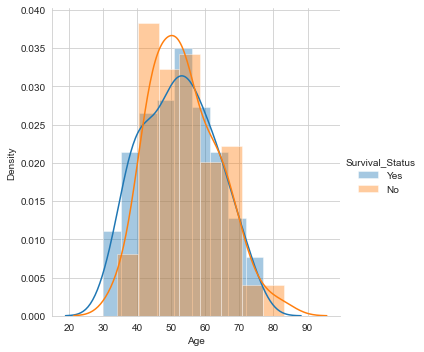

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",size=5).map(sns.distplot,"Age").add_legend()
plt.show()

Using Age as a parameter and plotting PDF.  

It is difficult to predict survival status .

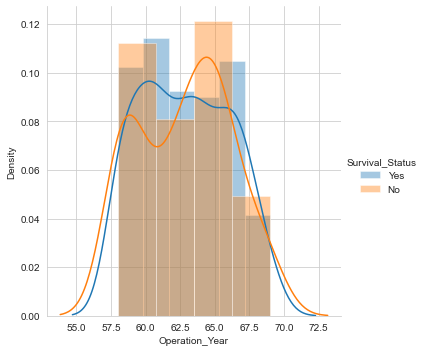

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Survival_Status",size=5).map(sns.distplot,"Operation_Year").add_legend();
plt.show();

Using Operation Year as a parameter and plotting PDF.

It is difficult to predict survival status .

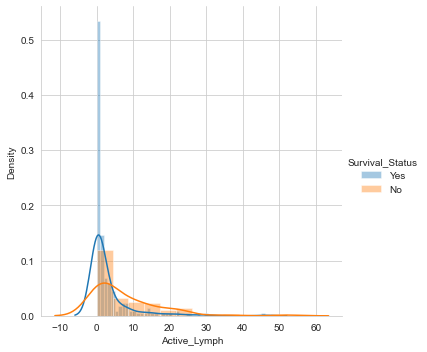

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",size=5).map(sns.distplot,"Active_Lymph").add_legend()
plt.show()

Using Active Lymph as a parameter and plotting PDF .

It is observed that with ZERO Active Lymph are survived more than 5 years.  

# 2. Analysis Using CDF

In [19]:
survival_less_5yrs = df[df["Survival_Status"]=="No"]
survival_more_5yrs=df[df["Survival_Status"]=="Yes"]

Pdf And Bin_Edges For Survival Less Than 5 Years On basis of Age

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

 Pdf And Bin_Edges For Survival More Than 5 Years On basis of Age

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


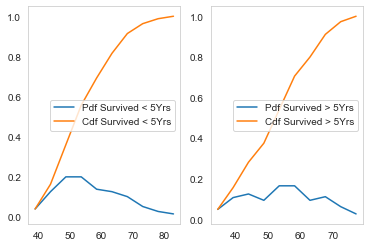

In [20]:
# Taking Age As A Parameter

counts ,bin_edges =np.histogram(survival_less_5yrs['Age'],bins=10,density=True)
pdf=counts/sum(counts)
print("Pdf And Bin_Edges For Survival Less Than 5 Years On basis of Age\n")
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.subplot(121)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf Survived < 5Yrs','Cdf Survived < 5Yrs'])



counts,bin_edges = np.histogram(survival_more_5yrs['Age'],bins=10,density=True)
pdf=counts/sum(counts)
print("\n Pdf And Bin_Edges For Survival More Than 5 Years On basis of Age\n")
print(pdf)
print(bin_edges)
cdf =np.cumsum(pdf)
plt.subplot(122)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf Survived > 5Yrs','Cdf Survived > 5Yrs'])
plt.show()

### Observation :

Taking Age As Parameter and plotting PDF and CDF Curve. 
It can be observed that due to overlapping we can not say that at this age people survived more than 5 years or less than 5 years.
So Age Can not be taken as Parameter.

Pdf And Bin_Edges For Survival Less Than 5 Years On basis of Active Lymph

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
Pdf And Bin_Edges For Survival More Than 5 Years On basis of Active Lymph

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


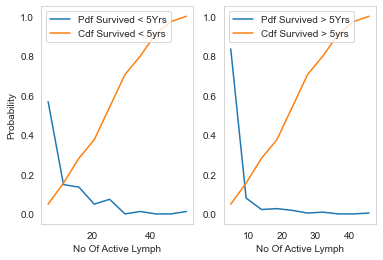

In [21]:
# Taking Active Lymph As A Parameter

counts,bin_edges=np.histogram(survival_less_5yrs["Active_Lymph"],bins=10,density=True)
pdf=counts/sum(counts)
print("Pdf And Bin_Edges For Survival Less Than 5 Years On basis of Active Lymph\n")
print(pdf)
print(bin_edges)
plt.subplot(121)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf Survived < 5Yrs','Cdf Survived < 5yrs'])
plt.xlabel("No Of Active Lymph")
plt.ylabel("Probability")



counts,bin_edges=np.histogram(survival_more_5yrs["Active_Lymph"],bins=10,density=True)
pdf=counts/sum(counts)
print("Pdf And Bin_Edges For Survival More Than 5 Years On basis of Active Lymph\n")
print(pdf)
print(bin_edges)
plt.subplot(122)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf Survived > 5Yrs','Cdf Survived > 5yrs'])
plt.xlabel("No Of Active Lymph")
plt.show()

### Observation :

Taking Active Lymph as Parameter and Plotting PDF and CDF curve .
It can be observed that approximately 83% of the people survived more than 5 years having number of active lymph less than 5.

Pdf And Bin_Edges For Survival Less Than 5 Years On basis of Operation Year

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
Pdf And Bin_Edges For Survival More Than 5 Years On basis of Operation Year

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


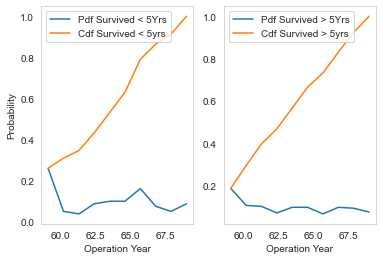

In [22]:
# Taking Operation Year As A parameter 

counts,bin_edges=np.histogram(survival_less_5yrs["Operation_Year"],bins=10,density=True)
pdf=counts/sum(counts)
print("Pdf And Bin_Edges For Survival Less Than 5 Years On basis of Operation Year\n")
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.subplot(121)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf Survived < 5Yrs','Cdf Survived < 5yrs'])
plt.xlabel("Operation Year")
plt.ylabel("Probability")



counts,bin_edges=np.histogram(survival_more_5yrs["Operation_Year"])
pdf=counts/sum(counts)
print("Pdf And Bin_Edges For Survival More Than 5 Years On basis of Operation Year\n")
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.subplot(122)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf Survived > 5Yrs','Cdf Survived > 5yrs'])
plt.xlabel("Operation Year")
plt.show()

### Observation :

Taking Operation Year as Parameter and Plotting Pdf and Cdf.
It can be observed due to overlapping we can not say that in this year people who got treatment survived for more than or less than 5 years.
So we can not take Operation year as parameter.


## 3. Analysis Using Box Plot

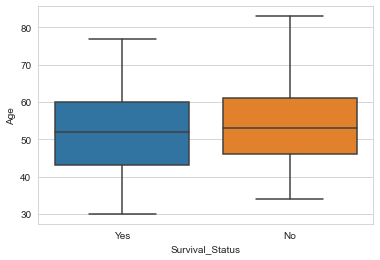

In [23]:
# Taking Age As A Parameter

sns.boxplot(x="Survival_Status",y="Age",data=df)
plt.show()

### Observation :

Taking Age as a parameter we can not distinguish between the survival status due to overlapping.

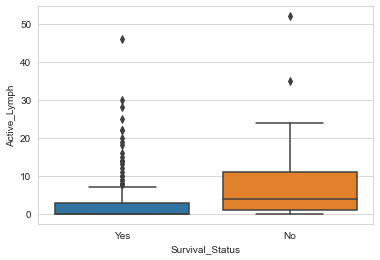

In [24]:
# Taking Active Lymph as a Parameter
sns.boxplot(x="Survival_Status",y="Active_Lymph",data=df)
plt.show()

### Observation :

Taking Active Lymph as a parameter we can distinguish since median line of both are not overlapping.

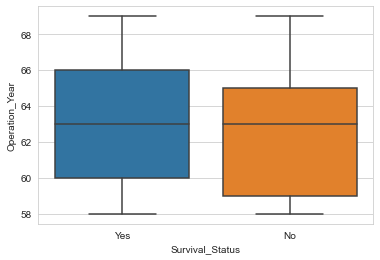

In [25]:
# Taking Operation Year as a Parameter
sns.boxplot(x="Survival_Status",y="Operation_Year",data=df)
plt.show()

### Observation :

Taking Operation Year as a parameter we can not distinguish survival status due to overlapping.
Median line of both the box is overlapped.


## 4. Analysis Using Violin Plot

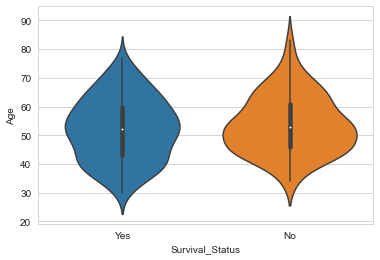

In [26]:
# Taking Age as a parameter
sns.violinplot(x="Survival_Status",y="Age",data=df)
plt.show()

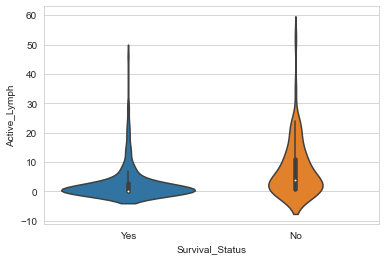

In [27]:
# Taking Active Lymph as a parameter

sns.violinplot(x="Survival_Status",y="Active_Lymph",data=df)
plt.show()

[]

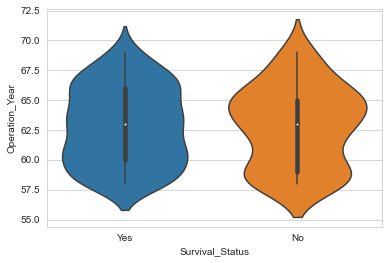

In [28]:
# Taking Operation Year as a Parameter
sns.violinplot(x="Survival_Status",y="Operation_Year",data=df)
plt.plot()

## Conclusion :


1. From Uni-Variate Analysis we are able to find which parameter can help in order to determine the survival_status. 

2. Active Lymph seems to be good parameter from other parameter for uni-variate analysis. 

# Analysis Using  Bi-Variate 

## 1. Pair-Plot

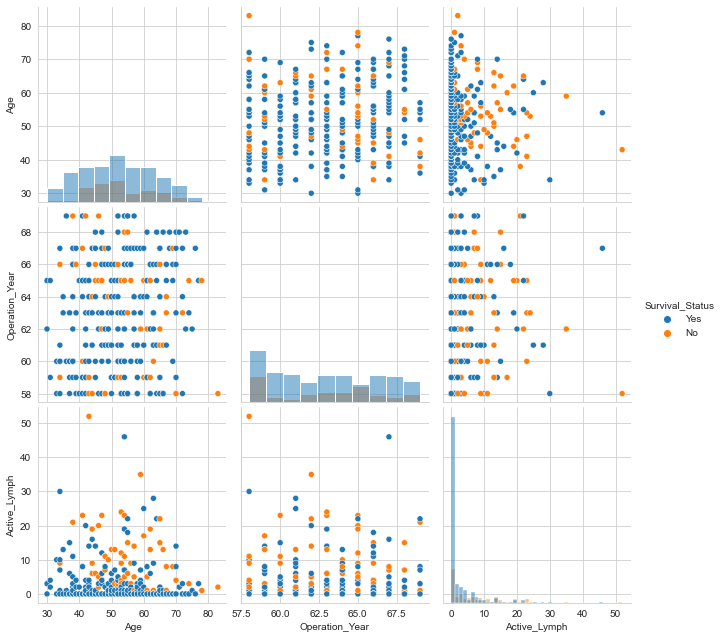

In [29]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Survival_Status",diag_kind="hist",size=3)
plt.show()

## 2. 2-D Scatter Plot

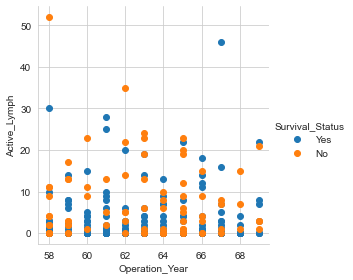

In [30]:
# Taking operation year and Active Lymph as Parameter

sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",size=4).map(plt.scatter,"Operation_Year","Active_Lymph").add_legend()
plt.show()

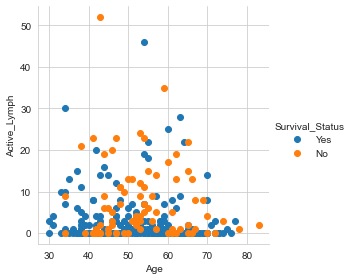

In [31]:
# Taking Age and Active Lymph as Parameter
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",size=4).map(plt.scatter,"Age","Active_Lymph").add_legend()
plt.show()

## Conclusion :

Combination of parameters can not be used in order to distinguish survival status because it is not linearly separable.

# THANK YOU